In [1]:
from utility_bferror import *

tb = BFSolver_Toolbox()
er = BFSovler3D_Error()

# 1. Try One Case

array([0.10906   , 0.11190817, 0.11046231])

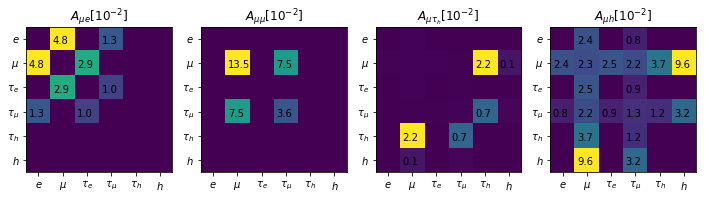

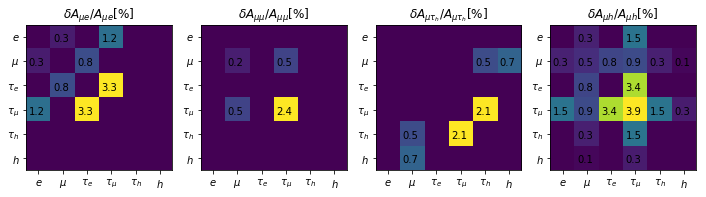

In [2]:
i,trigger = 0,"mu"

ndata,ndataVar = er.ndata[i],er.ndataVar[i]
nmcbg,nmcbgVar = er.nmcbg[i],er.nmcbgVar[i]
nfake,nfakeVar = er.nfake[i],er.nfakeVar[i]
a,aVar = er.a[i],er.aVar[i]
aVar[a<0.001]=np.zeros_like(a)[a<0.001]

tb.imshow4Matrix(a,trigger)
tb.imshow4Matrix(aVar**0.5/(a+1e-12),trigger,showError=True)

slv = BFSolver3D(a)
slv.solveQuadEqn(slv.setMeasuredX(nData=ndata, nMcbg=nmcbg+nfake))

# 2. Calculate Statistical Error

In [3]:
statistcal = [ er.errStat(source,100) for source in ["data","mcbg","fake","mcsg"] ]
statistcal

mcsg-3: 100%|██████████| 100/100 [00:07<00:00, 14.30it/s]


[array([[0.00059489, 0.00056173, 0.00130075],
        [0.00106373, 0.00095736, 0.00216777],
        [0.00074716, 0.00058169, 0.00150431],
        [0.00131227, 0.00103913, 0.00258627]]),
 array([[7.80934856e-05, 1.55557465e-04, 3.17169471e-04],
        [7.02765776e-05, 1.35546810e-04, 3.54434356e-04],
        [1.74419831e-04, 8.10297536e-05, 3.81780765e-04],
        [1.67559486e-04, 6.26171591e-05, 2.27919052e-04]]),
 array([[4.90494124e-06, 4.99352671e-06, 1.01706409e-05],
        [9.48831134e-06, 9.39204527e-06, 1.61256939e-05],
        [0.00000000e+00, 8.32667268e-17, 1.66533454e-16],
        [4.16333634e-17, 6.93889390e-17, 2.77555756e-17]]),
 array([[0.00030377, 0.00022102, 0.0005366 ],
        [0.00041192, 0.00044407, 0.00091538],
        [0.00035103, 0.00028677, 0.00051743],
        [0.00062781, 0.00046135, 0.00096134]])]

In [3]:
sysCrossSection = [ er.errSystem_crossSection(source) for source in ["mcbg","fake","mcsg"] ]
sysObjectEff = [ er.errSystem_objectEff(source) for source in ["e","mu","tau"] ]

In [3]:
sysTTTheory = [ er.errSystem_TTTheory(source) for source in ["isr","fsr","","hdamp"] ]
sysEnergyScale = [ er.errSystem_EnergyScale(source) for source in ["e","mu","tau"] ]
sysJet = [ er.errSystem_Jet(source) for source in ["JES","JER","BTag","Mistag"] ]
sysLHE = [ er.errSystem_Jet(source) for source in ["Renorm","Factor","PDF"] ]

In [6]:
sysCrossSection

[array([[ 2.95832190e-04, -4.05028704e-04,  1.28084694e-04],
        [ 9.61459076e-05, -7.33980511e-05,  2.92454786e-05],
        [-2.22998762e-04,  2.86822610e-04,  1.39503109e-04],
        [-4.77498489e-05,  9.90146611e-05,  8.84261489e-05]]),
 array([[0.0005939 , 0.00060463, 0.00123148],
        [0.00061957, 0.00061328, 0.00105297],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]]),
 array([[ 2.77555756e-17,  0.00000000e+00,  1.38777878e-17],
        [-4.16333634e-17,  0.00000000e+00,  0.00000000e+00],
        [ 2.77555756e-17,  0.00000000e+00,  2.77555756e-17],
        [ 1.38777878e-17,  0.00000000e+00, -1.38777878e-17]])]

In [4]:
statistcal = [
array([[0.00058471, 0.00055222, 0.00128213],
        [0.00103972, 0.0009356 , 0.00212308],
        [0.00074716, 0.00058169, 0.00150431],
        [0.00131234, 0.00103913, 0.00258625]]),
 array([[6.61512940e-05, 1.42912412e-04, 3.02112833e-04],
        [6.90516911e-05, 1.37211711e-04, 3.54529833e-04],
        [1.79947134e-04, 8.01719964e-05, 3.43327517e-04],
        [1.70423959e-04, 6.33650466e-05, 2.20486491e-04]]),
 array([[3.40400602e-05, 4.00668729e-05, 1.81154212e-04],
        [4.29977529e-05, 4.86484396e-05, 2.13687935e-04],
        [1.84574578e-15, 2.15105711e-15, 1.91513472e-15],
        [7.91033905e-16, 1.30451205e-15, 1.47104551e-15]]),
 array([[0.00028224, 0.00024627, 0.00062993],
        [0.00047373, 0.00040037, 0.00088127],
        [0.00035044, 0.00027509, 0.00064049],
        [0.00059947, 0.00048348, 0.00103858]])
]
err = np.array(statistcal+sysCrossSection+sysObjectEff+sysTTTheory+sysEnergyScale+sysJet+sysLHE).transpose(1,0,2)
err

array([[[ 5.84710000e-04,  5.52220000e-04,  1.28213000e-03],
        [ 6.61512940e-05,  1.42912412e-04,  3.02112833e-04],
        [ 3.40400602e-05,  4.00668729e-05,  1.81154212e-04],
        [ 2.82240000e-04,  2.46270000e-04,  6.29930000e-04],
        [ 2.87336562e-04, -4.01374604e-04,  1.06370908e-04],
        [ 3.88211214e-04,  4.13226106e-04,  8.42779058e-05],
        [ 4.16333634e-17,  2.77555756e-17,  6.93889390e-17],
        [-1.09509154e-03,  1.01810141e-04,  8.04207781e-05],
        [ 1.45225819e-04, -1.26340101e-03,  1.25772360e-04],
        [ 1.29899565e-03,  1.59218230e-03, -8.10098575e-03],
        [ 5.62129958e-04,  5.85111491e-04,  4.02470317e-03],
        [ 5.94254431e-03,  7.03125944e-03,  3.13162439e-02],
        [ 2.34632926e-04,  5.07020958e-04,  2.13673740e-03],
        [ 5.81618046e-04,  7.91688517e-04,  1.94382509e-03],
        [ 2.91485784e-04, -2.70992973e-05, -2.14059752e-05],
        [-1.47212170e-04,  2.00644254e-04,  2.14625240e-05],
        [ 3.56039284e-04

In [5]:
sysTTTheory

NameError: name 'sysTTTheory' is not defined

In [4]:
er.io_printErrorForExcelFormat(err)

0.538,0.508,1.181, 0.957,0.862,1.955, 0.688,0.536,1.385, 1.208,0.957,2.381
0.061,0.132,0.278, 0.064,0.126,0.326, 0.166,0.074,0.316, 0.157,0.058,0.203
0.031,0.037,0.167, 0.040,0.045,0.197, 0.000,0.000,0.000, 0.000,0.000,0.000
0.260,0.227,0.580, 0.436,0.369,0.811, 0.323,0.253,0.590, 0.552,0.445,0.956
0.265,0.370,0.098, 0.085,0.068,0.022, 0.205,0.264,0.128, 0.044,0.091,0.081
0.357,0.381,0.078, 0.247,0.252,0.144, 0.000,0.000,0.000, 0.000,0.000,0.000
0.000,0.000,0.000, 0.000,0.000,0.000, 0.000,0.000,0.000, 0.000,0.000,0.000
1.008,0.094,0.074, 1.027,0.094,0.072, 1.058,0.107,0.080, 1.016,0.100,0.080
0.134,1.163,0.116, 0.125,1.065,0.103, 0.105,1.010,0.097, 0.107,1.018,0.098
1.196,1.466,7.459, 1.041,1.254,6.524, 1.135,1.371,7.508, 0.986,1.224,6.685
0.518,0.539,3.706, 1.442,1.069,2.411, 0.286,1.168,3.171, 0.069,0.412,2.743
5.472,6.474,28.836, 4.383,6.007,22.911, 5.568,6.314,30.096, 4.829,5.722,21.645
0.216,0.467,1.968, 0.093,1.277,1.354, 0.042,0.319,1.182, 0.433,0.500,0.410
0.536,0.729,1.790, 1.

In [3]:
err = array([[[ 5.84710000e-04,  5.52220000e-04,  1.28213000e-03],
        [ 6.61512940e-05,  1.42912412e-04,  3.02112833e-04],
        [ 3.40400602e-05,  4.00668729e-05,  1.81154212e-04],
        [ 2.82240000e-04,  2.46270000e-04,  6.29930000e-04],
        [ 2.87336562e-04, -4.01374604e-04,  1.06370908e-04],
        [ 3.88211214e-04,  4.13226106e-04,  8.42779058e-05],
        [ 4.16333634e-17,  2.77555756e-17,  6.93889390e-17],
        [-1.09509154e-03,  1.01810141e-04,  8.04207781e-05],
        [ 1.45225819e-04, -1.26340101e-03,  1.25772360e-04],
        [ 1.29899565e-03,  1.59218230e-03, -8.10098575e-03],
        [ 5.62129958e-04,  5.85111491e-04,  4.02470317e-03],
        [ 5.94254431e-03,  7.03125944e-03,  3.13162439e-02],
        [ 2.34632926e-04,  5.07020958e-04,  2.13673740e-03],
        [ 5.81618046e-04,  7.91688517e-04,  1.94382509e-03],
        [ 2.91485784e-04, -2.70992973e-05, -2.14059752e-05],
        [-1.47212170e-04,  2.00644254e-04,  2.14625240e-05],
        [ 3.56039284e-04,  4.36420531e-04, -2.22035602e-03],
        [ 1.98363664e-03,  1.44655869e-03,  3.82074464e-03],
        [ 1.41588967e-04,  5.07635014e-05,  4.51270285e-04],
        [ 1.37073799e-04,  5.28600551e-04,  7.91475822e-04],
        [ 1.54141851e-04,  1.54105806e-04,  1.18104121e-05],
        [ 3.17944815e-04,  2.28936469e-04,  8.09254321e-04],
        [ 2.21427625e-04,  1.65653656e-04,  6.25526546e-04],
        [ 4.55872789e-05,  3.10990822e-05,  2.12638961e-04]],

       [[ 1.03972000e-03,  9.35600000e-04,  2.12308000e-03],
        [ 6.90516911e-05,  1.37211711e-04,  3.54529833e-04],
        [ 4.29977529e-05,  4.86484396e-05,  2.13687935e-04],
        [ 4.73730000e-04,  4.00370000e-04,  8.81270000e-04],
        [ 9.21445388e-05, -7.34987504e-05,  2.38929229e-05],
        [ 2.68409651e-04,  2.73796522e-04,  1.56109497e-04],
        [ 2.77555756e-17,  1.38777878e-17,  0.00000000e+00],
        [-1.11547317e-03,  1.02551541e-04,  7.86726015e-05],
        [ 1.35364004e-04, -1.15662137e-03,  1.11952025e-04],
        [ 1.13048166e-03,  1.36231492e-03, -7.08552433e-03],
        [ 1.56578254e-03,  1.16045485e-03,  2.61832097e-03],
        [ 4.76000223e-03,  6.52332409e-03,  2.48809342e-02],
        [ 1.00977848e-04,  1.38682480e-03,  1.47050386e-03],
        [ 1.92634708e-03,  8.41461074e-04,  9.99146460e-04],
        [ 3.21073768e-04, -2.95180182e-05, -2.26450841e-05],
        [-3.35537729e-04,  2.84148294e-04,  2.60786745e-05],
        [ 2.76822918e-04,  3.33609377e-04, -1.73511944e-03],
        [ 1.87205808e-03,  1.68387089e-03,  2.86191428e-03],
        [ 1.20222196e-04,  2.39759453e-04,  2.91006471e-04],
        [ 1.92777673e-04,  1.12506866e-04,  2.19055274e-04],
        [ 1.61456199e-04,  9.66832642e-05,  2.57861955e-04],
        [ 2.25931292e-04,  2.73328338e-04,  9.40245495e-04],
        [ 3.98933040e-04,  2.94221569e-04,  2.88394759e-04],
        [ 1.54229402e-05,  3.49129223e-05,  1.38034039e-04]],

       [[ 7.47160000e-04,  5.81690000e-04,  1.50431000e-03],
        [ 1.79947134e-04,  8.01719964e-05,  3.43327517e-04],
        [ 1.84574578e-15,  2.15105711e-15,  1.91513472e-15],
        [ 3.50440000e-04,  2.75090000e-04,  6.40490000e-04],
        [-2.22998611e-04,  2.86817077e-04,  1.39504006e-04],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -2.77555756e-17, -4.16333634e-17],
        [-1.14951774e-03,  1.15881825e-04,  8.69178195e-05],
        [ 1.13613513e-04, -1.09720388e-03,  1.05422305e-04],
        [ 1.23267428e-03,  1.48859290e-03, -8.15349069e-03],
        [ 3.10777875e-04,  1.26844886e-03,  3.44404143e-03],
        [ 6.04682629e-03,  6.85669704e-03,  3.26845188e-02],
        [ 4.55589778e-05,  3.46434996e-04,  1.28329713e-03],
        [ 6.61452272e-04,  1.79743702e-03,  1.59955381e-03],
        [ 1.29014678e-04, -2.20099974e-04,  6.26986614e-05],
        [-2.72434054e-05,  2.63098700e-04, -2.52792424e-05],
        [ 3.12456380e-04,  3.77387335e-04, -2.06697874e-03],
        [ 1.48216418e-03,  1.88321986e-03,  4.05115971e-03],
        [ 1.18447337e-04,  1.80174462e-04,  3.37463878e-04],
        [ 3.74811405e-04,  1.63964494e-04,  6.59574047e-04],
        [ 8.64764645e-05,  1.14699387e-04,  1.46660168e-04],
        [ 2.90307633e-04,  2.45676212e-04,  8.59174644e-04],
        [ 1.53617802e-04,  2.00945003e-04,  6.62764297e-04],
        [ 2.82448383e-05,  4.40932240e-05,  1.98433752e-04]],

       [[ 1.31234000e-03,  1.03913000e-03,  2.58625000e-03],
        [ 1.70423959e-04,  6.33650466e-05,  2.20486491e-04],
        [ 7.91033905e-16,  1.30451205e-15,  1.47104551e-15],
        [ 5.99470000e-04,  4.83480000e-04,  1.03858000e-03],
        [-4.77358750e-05,  9.90130477e-05,  8.84254412e-05],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.77555756e-17, -2.77555756e-17,  2.77555756e-17],
        [-1.10333820e-03,  1.09045592e-04,  8.73121250e-05],
        [ 1.16665698e-04, -1.10605748e-03,  1.06129292e-04],
        [ 1.07084962e-03,  1.32954204e-03, -7.26033362e-03],
        [ 7.45511515e-05,  4.47742947e-04,  2.97887988e-03],
        [ 5.24465904e-03,  6.21367527e-03,  2.35059932e-02],
        [ 4.70333041e-04,  5.43137542e-04,  4.45757816e-04],
        [ 1.17998682e-03,  9.54452833e-04,  3.73179159e-03],
        [ 5.26042862e-05, -2.92590529e-04,  2.08432244e-04],
        [-3.72048631e-05,  3.52723304e-04, -3.38447914e-05],
        [ 2.09440077e-04,  2.60062615e-04, -1.42007152e-03],
        [ 1.72165676e-03,  1.73516239e-03,  3.03773490e-03],
        [ 2.07380765e-04,  1.81614902e-04,  2.62010961e-04],
        [ 2.95903665e-04,  3.57149862e-04,  4.21560553e-04],
        [ 1.43516296e-04,  1.64519874e-04,  1.29361945e-04],
        [ 2.89929181e-04,  3.28222406e-04,  6.09623637e-04],
        [ 2.08544454e-04,  3.27523391e-04,  5.60955944e-04],
        [ 2.82001665e-05,  4.34710691e-05,  1.16333150e-04]]])

# 3. Making Plot

In [5]:
for cata,cataname in enumerate(["mu1b","mu2b","e1b","e2b"]):
    #error = np.sum(err**(-2),axis=0)**(-0.5) 
    error = np.abs(err[cata])

    x = 0.1086 * np.ones_like(error)
    y = np.arange(error.shape[0])[::-1]*2
    plt.figure(figsize=(3,0.4*y.max()))

    plt.errorbar(x[:,0],y+0.3,xerr=error[:,0], fmt='.',color='C0')
    plt.errorbar(x[:,1],y-0.0,xerr=error[:,1], fmt='.',color='C1')
    plt.errorbar(x[:,2],y-0.3,xerr=error[:,2], fmt='.',color='C2')

    for i in range(error.shape[0]):
        plt.text(0.114,y[i]+0.4,"{:4.4f}".format(error[i,0]),fontsize=8,color='C0')
        plt.text(0.114,y[i]-0.1  ,"{:4.4f}".format(error[i,1]),fontsize=8,color='C1')
        plt.text(0.114,y[i]-0.6,"{:4.4f}".format(error[i,2]),fontsize=8,color='C2')

    plt.xlim(0.104,0.118)
    plt.ylim(-2,y.max()+2)
    #plt.axvline(x=0.1086,c="k")
    plt.yticks([])
    #plt.xticks([])
    plt.savefig("../plot/error/{}.png".format(cataname),dpi=300)
    plt.close()

# 4. Combined

In [19]:
error = np.abs(err/0.1086 * 100)
np.sum(error**(-2),axis=0)**(-0.5)

/Users/zihengchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


array([[3.70809106e-01, 3.22090628e-01, 7.89740684e-01],
       [3.75888452e-02, 4.28720846e-02, 1.34786307e-01],
       [6.92580214e-13, 1.33732553e-12, 5.01436022e-13],
       [1.71641179e-01, 1.47046163e-01, 3.66576389e-01],
       [4.09028181e-02, 5.40955896e-02, 3.41856825e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.19310778e-14, 0.00000000e+00],
       [5.16397710e-01, 5.01053319e-02, 3.83140890e-02],
       [5.82037963e-02, 5.33322495e-01, 5.33236819e-02],
       [6.63405390e-01, 7.70448793e-01, 4.08274955e+00],
       [3.10700549e-02, 5.07458271e-02, 3.44785080e-02],
       [8.06993159e-03, 3.73980525e-02, 7.13659413e-02],
       [1.58782275e-02, 2.00082333e-02, 2.57664141e-02],
       [6.10589801e-03, 3.11978340e-03, 2.35776166e-02]])

In [2]:
""+"up"

'up'

In [26]:
30*1.005

0.15